In [18]:
import torch
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import glob
import pandas as  pd
from matplotlib.patches import Rectangle
import os 

In [21]:
# loading climatologies

prism = xr.open_dataset('C:/Users/SBEALE/Desktop/full_domain/tmax_03_PRISM.nc')
prism_day = xr.open_dataset('C:/Users/SBEALE/Desktop/full_domain/tmax_03_PRISM_Daymet.nc')
worldclim = xr.open_dataset('C:/Users/SBEALE/Desktop/full_domain/tmax_03_WorldClim_coarse_focal_max_w15.nc')
daymet = xr.open_dataset('C:/Users/SBEALE/Desktop/full_domain/tmax_03_Daymet.nc')
coast = xr.open_dataset('C:/Users/SBEALE/Desktop/full_domain/coast.nc')
dem = xr.open_dataset('C:/Users/SBEALE/Desktop/full_domain/DEM.nc')
lat = xr.open_dataset('C:/Users/SBEALE/Desktop/full_domain/lat.nc')
lon = xr.open_dataset('C:/Users/SBEALE/Desktop/full_domain/lon.nc')

In [22]:
prism_coarse = xr.open_mfdataset('C:/Users/SBEALE/Desktop/full_domain/prism_coarse.nc')
landsea_wc = xr.open_mfdataset('C:/Users/SBEALE/Desktop/full_domain/WorldClim_mask_coarse.nc')

In [4]:
# selecting slice of upper BC for testing data

min_lon = -140
max_lon = -119
min_lat = 57
max_lat = 61

prism_day_test = prism_day.where((prism.latitude <= max_lat) & (prism.latitude >= min_lat) & (prism.longitude >= min_lon) & (prism.longitude <= max_lon))
day_test = daymet.where((daymet.latitude <= max_lat) & (daymet.latitude >= min_lat) & (daymet.longitude >= min_lon) & (daymet.longitude <= max_lon))
prism_test = prism.where((prism.latitude <= max_lat) & (prism.latitude >= min_lat) & (prism.longitude >= min_lon) & (prism.longitude <= max_lon))
worldclim_test = worldclim.where((worldclim.latitude <= max_lat) & (worldclim.latitude >= min_lat) & (worldclim.longitude >= min_lon) & (worldclim.longitude <= max_lon))
landsea_test = landsea_wc.where((landsea_wc.latitude <= max_lat) & (landsea_wc.latitude >= min_lat) & (landsea_wc.longitude >= min_lon) & (landsea_wc.longitude <= max_lon))

coast_test = coast.where((coast.latitude <= max_lat) & (coast.latitude >= min_lat) & (coast.longitude >= min_lon) & (coast.longitude <= max_lon))
dem_test = dem.where((dem.latitude <= max_lat) & (dem.latitude >= min_lat) & (dem.longitude >= min_lon) & (dem.longitude <= max_lon))
lat_test = lat.where((lat.latitude <= max_lat) & (lat.latitude >= min_lat) & (lat.longitude >= min_lon) & (lat.longitude <= max_lon))
lon_test = lon.where((lon.latitude <= max_lat) & (lon.latitude >= min_lat) & (lon.longitude >= min_lon) & (lon.longitude <= max_lon))

In [5]:
prism['tmax'].loc[dict(latitude=slice(max_lat, min_lat), longitude=slice(min_lon, max_lon))] = np.nan
prism_day['tmax'].loc[dict(latitude=slice(max_lat, min_lat), longitude=slice(min_lon, max_lon))] = np.nan
daymet['tmax'].loc[dict(latitude=slice(max_lat, min_lat), longitude=slice(min_lon, max_lon))] = np.nan
worldclim['tmax'].loc[dict(latitude=slice(max_lat, min_lat), longitude=slice(min_lon, max_lon))] = np.nan
landsea_wc['mask'].loc[dict(latitude=slice(max_lat, min_lat), longitude=slice(min_lon, max_lon))] = np.nan

coast['dist'].loc[dict(latitude=slice(max_lat, min_lat), longitude=slice(min_lon, max_lon))] = np.nan
dem['dem'].loc[dict(latitude=slice(max_lat, min_lat), longitude=slice(min_lon, max_lon))] = np.nan
lat['lat'].loc[dict(latitude=slice(max_lat, min_lat), longitude=slice(min_lon, max_lon))] = np.nan
lon['lon'].loc[dict(latitude=slice(max_lat, min_lat), longitude=slice(min_lon, max_lon))] = np.nan

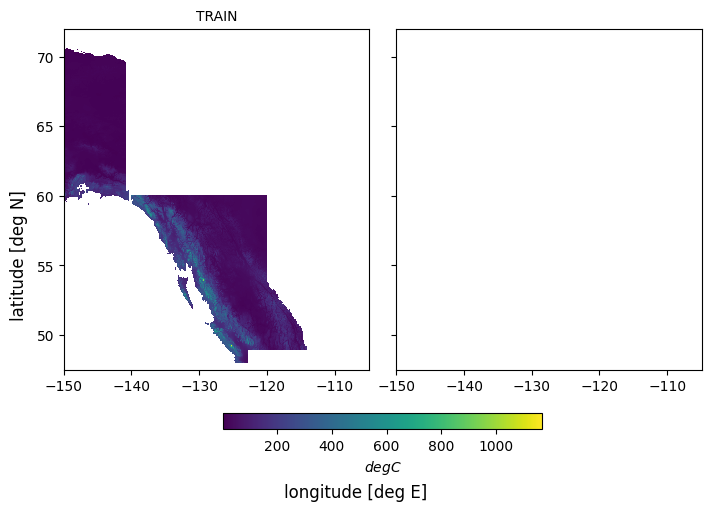

In [12]:
fig, ax = plt.subplots(1, 2, layout='constrained', figsize=(7, 5), sharex=True, sharey=True)

pc1 = ax[0].pcolormesh(prism.longitude, prism.latitude, prism.tmax, cmap='viridis', label=r'$m$')
ax[0].set_title(f'TRAIN', fontsize='medium', loc='center')

# pc1 = ax[1].pcolormesh(prism_test.longitude, prism_test.latitude, prism_test.tmax, cmap='viridis', label=r'$m$')
# ax[1].set_title(f'TEST', fontsize='medium', loc='center')

fig.supylabel('latitude [deg N]')
fig.supxlabel('longitude [deg E]')

fig.colorbar(pc1, shrink=0.5, aspect=20, location='bottom', ax=ax[0:2], label=r'$deg C$')

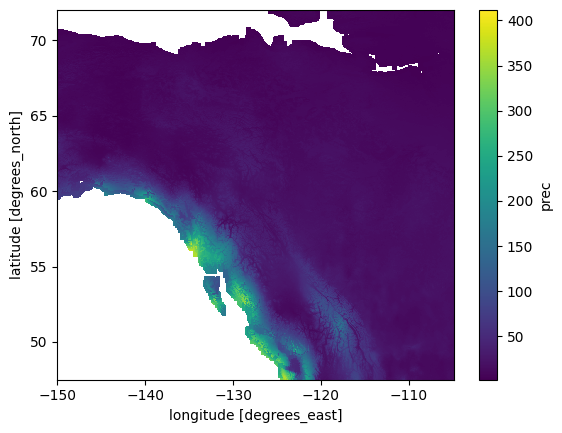

In [13]:
worldclim.tmax.plot(cmap='viridis')

In [8]:
worldclim_tens = torch.from_numpy(np.array(worldclim.tmax))
prism_tens = torch.from_numpy(np.array(prism.tmax))
prism_day_tens = torch.from_numpy(np.array(prism_day.tmax))
day_tens = torch.from_numpy(np.array(daymet.tmax))
prism_coarse_tens = torch.from_numpy(np.array(prism_coarse.tmax))
dem_tens = torch.from_numpy(np.array(dem.dem))
lat_tens = torch.from_numpy(np.array(lat.lat))
lon_tens = torch.from_numpy(np.array(lon.lon))
coast_tens = torch.from_numpy(np.array(coast.dist))

In [9]:
worldclim_tens = worldclim_tens.where(np.isnan(prism_coarse_tens)==False, np.nan)
dem_tens = dem_tens.where(np.isnan(prism_tens)==False, np.nan)
lat_tens = lat_tens.where(np.isnan(prism_tens)==False, np.nan)
lon_tens = lon_tens.where(np.isnan(prism_tens)==False, np.nan)
coast_tens = coast_tens.where(np.isnan(prism_tens)==False, np.nan)

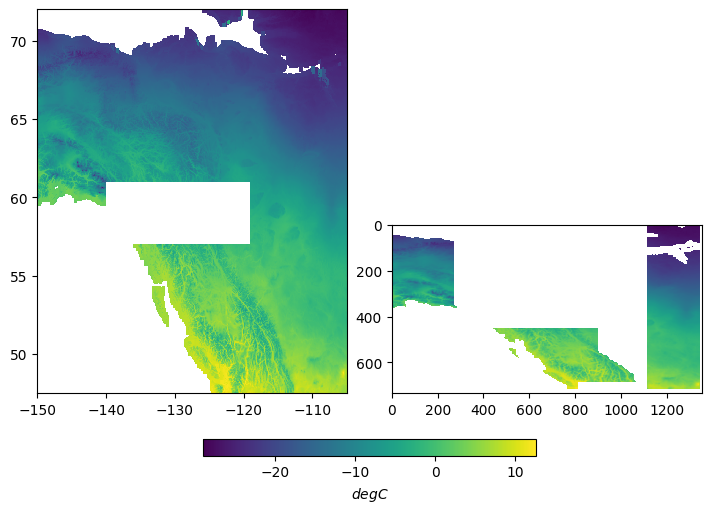

In [10]:
fig, ax = plt.subplots(1, 2, layout='constrained', figsize=(7, 5))

pc1 = ax[0].pcolormesh(worldclim.longitude, worldclim.latitude, worldclim.tmax, cmap='viridis', label=r'$m$')
pc2 = ax[1].imshow(worldclim_tens, cmap='viridis', label=r'$m$')


fig.colorbar(pc1, shrink=0.5, aspect=20, location='bottom', ax=ax[0:2], label=r'$deg C$')

In [23]:
prism_tmax = prism['tmax']
worldclim_tmax = worldclim['tmax']
daymet_tmax = daymet['tmax']
prism_day_tmax = prism_day['tmax']
coast_dist = coast['dist']
dem_dem = dem['dem']
lat_lat = lat['lat']
lon_lon = lon['lon']

In [12]:
prism_mean = np.nanmean(prism_day_tens)
worldclim_mean = np.nanmean(worldclim_tens)
coast_mean = np.nanmean(coast_tens)
dem_mean = np.nanmean(dem_tens)
lat_mean = np.nanmean(lat_tens)
lon_mean = np.nanmean(lon_tens)

In [13]:
# calculating standard deviation 

prism_std = np.nanstd(prism_day_tens)
worldclim_std = np.nanstd(worldclim_tens)
coast_std = np.nanstd(coast_tens)
dem_std = np.nanstd(dem_tens)
lat_std = np.nanstd(lat_tens)
lon_std = np.nanstd(lon_tens)

In [14]:
prism_std


9.438272

In [15]:
import csv 
# standardization is done based on mean and standard deviation of training data
# testing data is normalized using that mean and std
# data rows as dictionary objects 
mydict =[{'var': 'tmax','clim': 'prism', 'mean': prism_mean, 'std':prism_std}, 
         {'var': 'tmax', 'clim': 'worldclim', 'mean': worldclim_mean, 'std':worldclim_std}, 
         {'var': 'dist from coast', 'clim': 'prism', 'mean':coast_mean, 'std':coast_std},
         {'var': 'dem', 'clim': 'prism', 'mean':dem_mean, 'std':dem_std},
         {'var': 'lat', 'clim': 'prism', 'mean':lat_mean, 'std':lat_std},
         {'var': 'lon', 'clim': 'prism', 'mean':lon_mean, 'std':lon_std},
         ]

# field names 
fields = ['var', 'clim', 'mean', 'std'] 

with open('C:/Users/SBEALE/Desktop/GAN Data/tmax/worldclim/full_domain_bc_test_shift16_32/standardization.csv', 'w', newline='') as file: 
    
    writer = csv.DictWriter(file, fieldnames = fields)

    writer.writeheader() 

    writer.writerows(mydict)

In [16]:
# standardizing all variables 
prism['tmax'] = (prism_tmax - prism_mean)/prism_std
daymet['tmax'] = (daymet_tmax - prism_mean)/prism_std
prism_day['tmax'] = (prism_day_tmax - prism_mean)/prism_std
worldclim['tmax'] = (worldclim_tmax - worldclim_mean)/worldclim_std
coast['dist'] = (coast_dist - coast_mean)/coast_std
dem['dem'] = (dem_dem - dem_mean)/dem_std
lat['lat'] = (lat_lat - lat_mean)/lat_std
lon['lon'] = (lon_lon - lon_mean)/lon_std

In [17]:
# standardizing test variables 
prism_tmax = prism_test['tmax']
worldclim_tmax = worldclim_test['tmax']
daymet_tmax = day_test['tmax']
prism_day_tmax = prism_day_test['tmax']
coast_dist = coast_test['dist']
dem_dem = dem_test['dem']
lat_lat = lat_test['lat']
lon_lon = lon_test['lon']

prism_test['tmax'] = (prism_tmax - prism_mean)/prism_std
day_test['tmax'] = (daymet_tmax - prism_mean)/prism_std
prism_day_test['tmax'] = (prism_day_tmax - prism_mean)/prism_std
worldclim_test['tmax'] = (worldclim_tmax - worldclim_mean)/worldclim_std
coast_test['dist'] = (coast_dist - coast_mean)/coast_std
dem_test['dem'] = (dem_dem - dem_mean)/dem_std
lat_test['lat'] = (lat_lat - lat_mean)/lat_std
lon_test['lon'] = (lon_lon - lon_mean)/lon_std

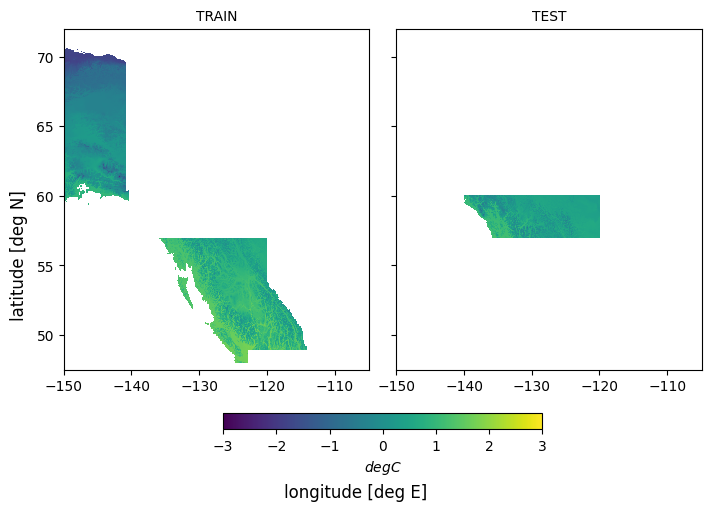

In [18]:
fig, ax = plt.subplots(1, 2, layout='constrained', figsize=(7, 5), sharex=True, sharey=True)

pc1 = ax[0].pcolormesh(prism.longitude, prism.latitude, prism.tmax, cmap='viridis', vmin=-3, vmax=3, label=r'$m$')
ax[0].set_title(f'TRAIN', fontsize='medium', loc='center')

pc1 = ax[1].pcolormesh(prism_test.longitude, prism_test.latitude, prism_test.tmax, cmap='viridis', vmin=-3, vmax=3, label=r'$m$')
ax[1].set_title(f'TEST', fontsize='medium', loc='center')

fig.supylabel('latitude [deg N]')
fig.supxlabel('longitude [deg E]')

fig.colorbar(pc1, shrink=0.5, aspect=20, location='bottom', ax=ax[0:2], label=r'$deg C$')

In [25]:
prism_day.tmax.to_netcdf('C:/Users/SBEALE/Desktop/GAN Data/tmax/worldclim/full_domain_bc_test_shift16_32/prism_train.nc')
worldclim.tmax.to_netcdf('C:/Users/SBEALE/Desktop/GAN Data/tmax/worldclim/full_domain_bc_test_shift16_32/worldclim_train.nc')
landsea_wc.mask.to_netcdf('C:/Users/SBEALE/Desktop/GAN Data/tmax/worldclim/full_domain_bc_test_shift16_32/worldclim_mask_train.nc')
dem.dem.to_netcdf('C:/Users/SBEALE/Desktop/GAN Data/tmax/worldclim/full_domain_bc_test_shift16_32/dem_train.nc')
lat.lat.to_netcdf('C:/Users/SBEALE/Desktop/GAN Data/tmax/worldclim/full_domain_bc_test_shift16_32/lat_train.nc')
lon.lon.to_netcdf('C:/Users/SBEALE/Desktop/GAN Data/tmax/worldclim/full_domain_bc_test_shift16_32/lon_train.nc')
coast.dist.to_netcdf('C:/Users/SBEALE/Desktop/GAN Data/tmax/worldclim/full_domain_bc_test_shift16_32/coast_train.nc')

In [20]:
prism_day_test.tmax.to_netcdf('C:/Users/SBEALE/Desktop/GAN Data/tmax/worldclim/full_domain_bc_test_shift16_32/prism_test.nc')
worldclim_test.tmax.to_netcdf('C:/Users/SBEALE/Desktop/GAN Data/tmax/worldclim/full_domain_bc_test_shift16_32/worldclim_test.nc')
landsea_test.mask.to_netcdf('C:/Users/SBEALE/Desktop/GAN Data/tmax/worldclim/full_domain_bc_test_shift16_32/worldclim_mask_test.nc')
dem_test.dem.to_netcdf('C:/Users/SBEALE/Desktop/GAN Data/tmax/worldclim/full_domain_bc_test_shift16_32/dem_test.nc')
lat_test.lat.to_netcdf('C:/Users/SBEALE/Desktop/GAN Data/tmax/worldclim/full_domain_bc_test_shift16_32/lat_test.nc')
lon_test.lon.to_netcdf('C:/Users/SBEALE/Desktop/GAN Data/tmax/worldclim/full_domain_bc_test_shift16_32/lon_test.nc')
coast_test.dist.to_netcdf('C:/Users/SBEALE/Desktop/GAN Data/tmax/worldclim/full_domain_bc_test_shift16_32/coast_test.nc')

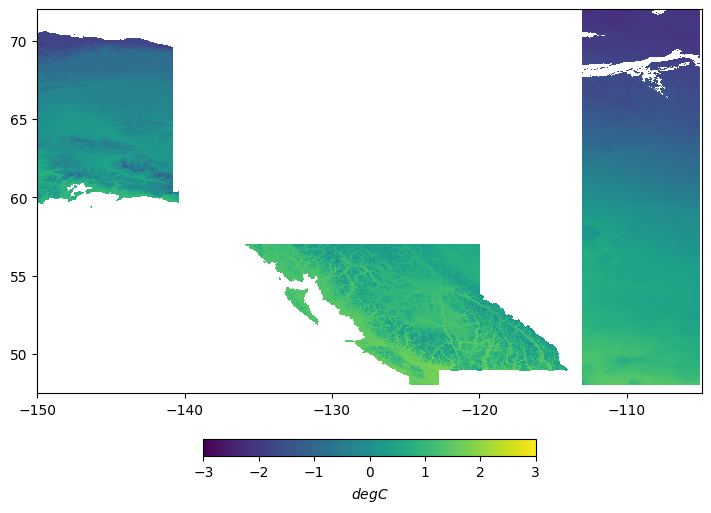

In [21]:
x = xr.open_dataset('C:/Users/SBEALE/Desktop/GAN Data/tmax/worldclim/full_domain_bc_test_shift16_32/prism_train.nc')

fig, ax = plt.subplots(1, 1, layout='constrained', figsize=(7, 5), sharex=True, sharey=True)

pc1 = ax.pcolormesh(x.longitude, x.latitude, x.tmax, cmap='viridis', vmin=-3, vmax=3, label=r'$m$')

# ax.set_ylim(50,51)
# ax.set_xlim(-125,-124)

fig.colorbar(pc1, shrink=0.5, aspect=20, location='bottom', label=r'$deg C$')

In [22]:
prism_pt = np.array(prism.tmax)
daymet_pt = np.array(daymet.tmax)
worldclim_pt = np.array(worldclim.tmax)
landsea_pt = np.array(landsea_wc.mask)
coast_pt = np.array(coast.dist)
dem_pt = np.array(dem.dem)
lat_pt = np.array(lat.lat)
lon_pt = np.array(lon.lon)

In [23]:
prism_test_pt = np.array(prism_test.tmax)
daymet_test_pt = np.array(day_test.tmax)
worldclim_test_pt = np.array(worldclim_test.tmax)
landsea_test_pt = np.array(landsea_test.mask)
coast_test_pt = np.array(coast_test.dist)
dem_test_pt = np.array(dem_test.dem)
lat_test_pt = np.array(lat_test.lat)
lon_test_pt = np.array(lon_test.lon)

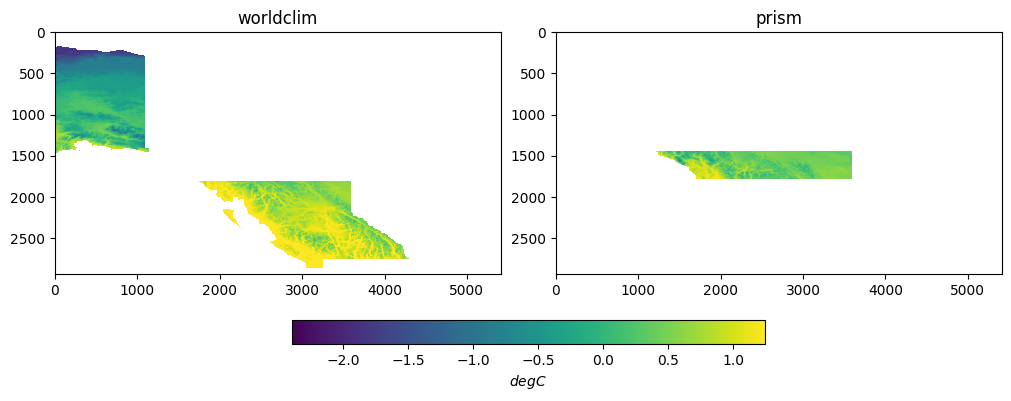

In [24]:
fig, ax = plt.subplots(1, 2, layout='constrained', figsize=(10, 5))

min = np.nanmin(prism_pt)
max = np.nanmax(prism_test_pt)

pc1 = ax[0].imshow(prism_pt, vmin=min, vmax=max, cmap='viridis', label=r'$m$')
ax[0].set_title('worldclim')

pc2 = ax[1].imshow(prism_test_pt, vmin=min, vmax=max, cmap='viridis', label=r'$m$')
ax[1].set_title('prism')

fig.colorbar(pc1, shrink=0.5, aspect=20, ax=ax[0:2], location='bottom', label=r'$deg C$')

In [25]:
x_fine = np.arange(0,prism_pt.shape[0]-128, 16)
y_fine = np.arange(0,prism_pt.shape[1]-128, 16)

x_coarse = np.arange(0,worldclim_pt.shape[0]-32, 4)
y_coarse = np.arange(0,worldclim_pt.shape[1]-32, 4)

tiles_fine_prism = []
tiles_fine_coast = []
tiles_fine_dem = []
tiles_fine_lat = []
tiles_fine_lon = []
for i in range(0, len(y_fine)):
    prism = prism_pt[:,0+y_fine[i]:128+y_fine[i]]
    coast = coast_pt[:,0+y_fine[i]:128+y_fine[i]]
    dem = dem_pt[:,0+y_fine[i]:128+y_fine[i]]
    lat = lat_pt[:,0+y_fine[i]:128+y_fine[i]]
    lon = lon_pt[:,0+y_fine[i]:128+y_fine[i]]
    for j in range(0, len(x_fine)):
        tiles_fine_prism.append(prism[0+x_fine[j]:128+x_fine[j]])
        tiles_fine_coast.append(coast[0+x_fine[j]:128+x_fine[j]])
        tiles_fine_dem.append(dem[0+x_fine[j]:128+x_fine[j]])
        tiles_fine_lat.append(lat[0+x_fine[j]:128+x_fine[j]])
        tiles_fine_lon.append(lon[0+x_fine[j]:128+x_fine[j]])
        
tiles_coarse_worldclim = []
tiles_coarse_landsea = []
for i in range(0, len(y_coarse)):
    worldclim = worldclim_pt[:,0+y_coarse[i]:32+y_coarse[i]]
    landsea = landsea_pt[:,0+y_coarse[i]:32+y_coarse[i]]
    for j in range(0, len(x_fine)):
        tiles_coarse_worldclim.append(worldclim[0+x_coarse[j]:32+x_coarse[j]])
        tiles_coarse_landsea.append(landsea[0+x_coarse[j]:32+x_coarse[j]])
        
# now for daymet 

x_fine = np.arange(0,prism_pt.shape[0]-128, 32)
y_fine = np.arange(0,prism_pt.shape[1]-128, 32)

x_coarse = np.arange(0,worldclim_pt.shape[0]-32, 8)
y_coarse = np.arange(0,worldclim_pt.shape[1]-32, 8)

tiles_fine_day = []
tiles_fine_coast2 = []
tiles_fine_dem2 = []
tiles_fine_lat2 = []
tiles_fine_lon2 = []
for i in range(0, len(y_fine)):
    day = daymet_pt[:,0+y_fine[i]:128+y_fine[i]]
    coast = coast_pt[:,0+y_fine[i]:128+y_fine[i]]
    dem = dem_pt[:,0+y_fine[i]:128+y_fine[i]]
    lat = lat_pt[:,0+y_fine[i]:128+y_fine[i]]
    lon = lon_pt[:,0+y_fine[i]:128+y_fine[i]]
    for j in range(0, len(x_fine)):
        tiles_fine_day.append(day[0+x_fine[j]:128+x_fine[j]])
        tiles_fine_coast2.append(coast[0+x_fine[j]:128+x_fine[j]])
        tiles_fine_dem2.append(dem[0+x_fine[j]:128+x_fine[j]])
        tiles_fine_lat2.append(lat[0+x_fine[j]:128+x_fine[j]])
        tiles_fine_lon2.append(lon[0+x_fine[j]:128+x_fine[j]])
        
tiles_coarse_worldclim2 = []
tiles_coarse_landsea2 = []
for i in range(0, len(y_coarse)):
    worldclim = worldclim_pt[:,0+y_coarse[i]:32+y_coarse[i]]
    landsea = landsea_pt[:,0+y_coarse[i]:32+y_coarse[i]]
    for j in range(0, len(x_fine)):
        tiles_coarse_worldclim2.append(worldclim[0+x_coarse[j]:32+x_coarse[j]])
        tiles_coarse_landsea2.append(landsea[0+x_coarse[j]:32+x_coarse[j]])

In [26]:
# testing data

x_fine = np.arange(0,prism_test_pt.shape[0]-128, 16)
y_fine = np.arange(0,prism_test_pt.shape[1]-128, 16)

x_coarse = np.arange(0,worldclim_test_pt.shape[0]-32, 4)
y_coarse = np.arange(0,worldclim_test_pt.shape[1]-32, 4)

tiles_fine_prism_test = []
tiles_fine_coast_test = []
tiles_fine_dem_test = []
tiles_fine_lat_test = []
tiles_fine_lon_test = []
for i in range(0, len(y_fine)):
    prism = prism_test_pt[:,0+y_fine[i]:128+y_fine[i]]
    coast = coast_test_pt[:,0+y_fine[i]:128+y_fine[i]]
    dem = dem_test_pt[:,0+y_fine[i]:128+y_fine[i]]
    lat = lat_test_pt[:,0+y_fine[i]:128+y_fine[i]]
    lon = lon_test_pt[:,0+y_fine[i]:128+y_fine[i]]
    for j in range(0, len(x_fine)):
        tiles_fine_prism_test.append(prism[0+x_fine[j]:128+x_fine[j]])
        tiles_fine_coast_test.append(coast[0+x_fine[j]:128+x_fine[j]])
        tiles_fine_dem_test.append(dem[0+x_fine[j]:128+x_fine[j]])
        tiles_fine_lat_test.append(lat[0+x_fine[j]:128+x_fine[j]])
        tiles_fine_lon_test.append(lon[0+x_fine[j]:128+x_fine[j]])
        
tiles_coarse_worldclim_test = []
tiles_coarse_landsea_test = []
for i in range(0, len(y_coarse)):
    worldclim = worldclim_test_pt[:,0+y_coarse[i]:32+y_coarse[i]]
    landsea = landsea_test_pt[:,0+y_coarse[i]:32+y_coarse[i]]
    for j in range(0, len(x_fine)):
        tiles_coarse_worldclim_test.append(worldclim[0+x_coarse[j]:32+x_coarse[j]])
        tiles_coarse_landsea_test.append(landsea[0+x_coarse[j]:32+x_coarse[j]])
        
# now for daymet 

x_fine = np.arange(0,prism_test_pt.shape[0]-128, 32)
y_fine = np.arange(0,prism_test_pt.shape[1]-128, 32)

x_coarse = np.arange(0,worldclim_test_pt.shape[0]-32, 8)
y_coarse = np.arange(0,worldclim_test_pt.shape[1]-32, 8)

tiles_fine_day_test = []
tiles_fine_coast2_test = []
tiles_fine_dem2_test = []
tiles_fine_lat2_test = []
tiles_fine_lon2_test = []
for i in range(0, len(y_fine)):
    day = daymet_test_pt[:,0+y_fine[i]:128+y_fine[i]]
    coast = coast_test_pt[:,0+y_fine[i]:128+y_fine[i]]
    dem = dem_test_pt[:,0+y_fine[i]:128+y_fine[i]]
    lat = lat_test_pt[:,0+y_fine[i]:128+y_fine[i]]
    lon = lon_test_pt[:,0+y_fine[i]:128+y_fine[i]]
    for j in range(0, len(x_fine)):
        tiles_fine_day_test.append(day[0+x_fine[j]:128+x_fine[j]])
        tiles_fine_coast2_test.append(coast[0+x_fine[j]:128+x_fine[j]])
        tiles_fine_dem2_test.append(dem[0+x_fine[j]:128+x_fine[j]])
        tiles_fine_lat2_test.append(lat[0+x_fine[j]:128+x_fine[j]])
        tiles_fine_lon2_test.append(lon[0+x_fine[j]:128+x_fine[j]])
        
tiles_coarse_worldclim2_test = []
tiles_coarse_landsea2_test = []
for i in range(0, len(y_coarse)):
    worldclim = worldclim_test_pt[:,0+y_coarse[i]:32+y_coarse[i]]
    landsea = landsea_test_pt[:,0+y_coarse[i]:32+y_coarse[i]]
    for j in range(0, len(x_fine)):
        tiles_coarse_worldclim2_test.append(worldclim[0+x_coarse[j]:32+x_coarse[j]])
        tiles_coarse_landsea2_test.append(landsea[0+x_coarse[j]:32+x_coarse[j]])

In [27]:
len

<function len(obj, /)>

In [28]:
tiles_fine_day_test[0].shape

(128, 128)

In [29]:
x = prism_test_pt

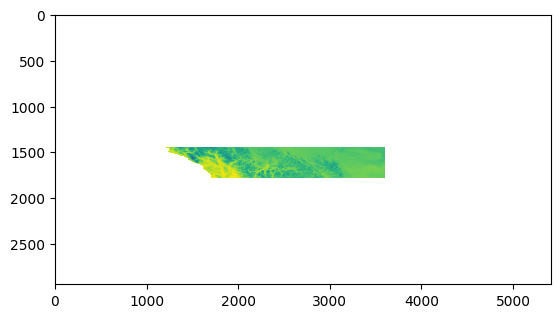

In [30]:
plt.imshow(x)

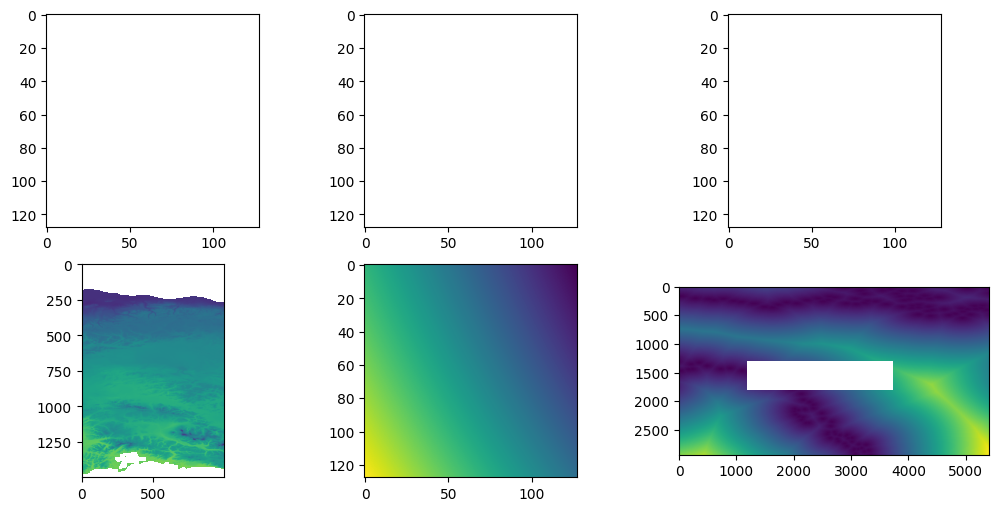

In [31]:
i = 3960+160+200+150+210+150+210+150+210+150+210+150+210+150+(5*210)+(5*150)-6
fig, ax = plt.subplots(2, 3, layout='constrained', figsize=(10, 5))

pc1 = ax[0,0].imshow(tiles_fine_prism[i], vmin=np.nanmin(prism_pt), vmax=np.nanmax(prism_pt))
pc1 = ax[0,1].imshow(tiles_fine_prism[i+5], vmin=np.nanmin(prism_pt), vmax=np.nanmax(prism_pt))
pc1 = ax[0,2].imshow(tiles_fine_prism[i+10], vmin=np.nanmin(prism_pt), vmax=np.nanmax(prism_pt))

pc1 = ax[1,1].imshow(np.nan_to_num(tiles_fine_coast[i], nan=np.nanmean(tiles_fine_coast[i])))
pc3 = ax[1,0].imshow(prism_pt[0:1500,0:1000], vmin=np.nanmin(prism_pt), vmax=np.nanmax(prism_pt))
pc4 = ax[1,2].imshow(coast_pt)

In [32]:
3960+160+200+150+210+150+210+150+210+150+210+150+210+150+(5*210)+(5*150)-6

8064

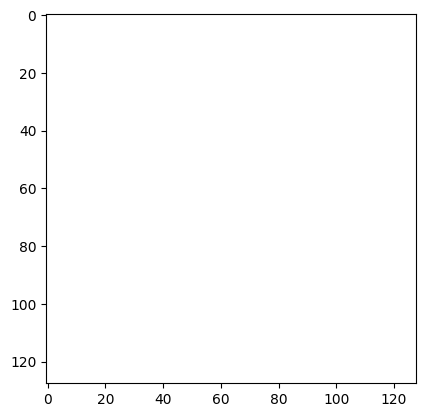

In [33]:
plt.imshow(tiles_fine_prism[8065])

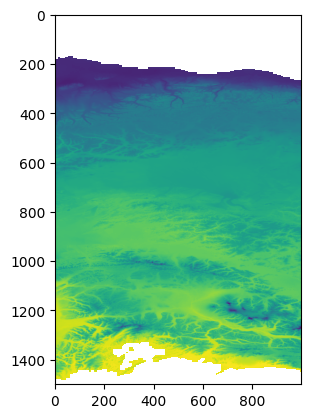

In [34]:
plt.imshow(prism_pt[0:1500,0:1000])

In [35]:
size_fine = 128*128
size_coarse = 32*32

good_tiles_prism = []
good_tiles_dem = []
good_tiles_coast = []
good_tiles_lat = []
good_tiles_lon = []

good_tiles_worldclim = []
good_tiles_landsea = []

for i in range(0, len(tiles_fine_prism)):
    ind = np.argwhere(np.isnan(tiles_fine_prism[i]))
    percent_nan_prism = ind.shape[0]/size_fine *100
    ind = np.argwhere(np.isnan(tiles_coarse_worldclim[i]))
    percent_nan_worldclim = ind.shape[0]/size_coarse *100
    if ((percent_nan_prism == 0) & (percent_nan_worldclim==0)):
        good_tiles_prism.append(tiles_fine_prism[i])
        good_tiles_dem.append(tiles_fine_dem[i])
        good_tiles_coast.append(tiles_fine_coast[i])
        good_tiles_lat.append(tiles_fine_lat[i])
        good_tiles_lon.append(tiles_fine_lon[i])
        
        good_tiles_worldclim.append(tiles_coarse_worldclim[i])
        good_tiles_landsea.append(tiles_coarse_landsea[i])

good_tiles_day = []
good_tiles_dem2 = []
good_tiles_coast2 = []
good_tiles_lat2 = []
good_tiles_lon2 = []

good_tiles_worldclim2 = []
good_tiles_landsea2 = []

for i in range(0, len(tiles_fine_day)):
    ind = np.argwhere(np.isnan(tiles_fine_day[i]))
    percent_nan_day = ind.shape[0]/size_fine *100
    ind = np.argwhere(np.isnan(tiles_coarse_worldclim2[i]))
    percent_nan_worldclim2 = ind.shape[0]/size_coarse *100
    if ((percent_nan_day == 0) & (percent_nan_worldclim2==0)):
        good_tiles_day.append(tiles_fine_day[i])
        good_tiles_dem2.append(tiles_fine_dem2[i])
        good_tiles_coast2.append(tiles_fine_coast2[i])
        good_tiles_lat2.append(tiles_fine_lat2[i])
        good_tiles_lon2.append(tiles_fine_lon2[i])
        
        good_tiles_worldclim2.append(tiles_coarse_worldclim2[i])
        good_tiles_landsea2.append(tiles_coarse_landsea2[i])

In [36]:
size_fine = 128*128
size_coarse = 32*32

good_tiles_prism_test = []
good_tiles_dem_test = []
good_tiles_coast_test = []
good_tiles_lat_test = []
good_tiles_lon_test = []

good_tiles_worldclim_test = []
good_tiles_landsea_test = []

for i in range(0, len(tiles_fine_prism_test)):
    ind = np.argwhere(np.isnan(tiles_fine_prism_test[i]))
    percent_nan_prism = ind.shape[0]/size_fine *100
    ind = np.argwhere(np.isnan(tiles_coarse_worldclim_test[i]))
    percent_nan_worldclim = ind.shape[0]/size_coarse *100
    if ((percent_nan_prism == 0) & (percent_nan_worldclim==0)):
        good_tiles_prism_test.append(tiles_fine_prism_test[i])
        good_tiles_dem_test.append(tiles_fine_dem_test[i])
        good_tiles_coast_test.append(tiles_fine_coast_test[i])
        good_tiles_lat_test.append(tiles_fine_lat_test[i])
        good_tiles_lon_test.append(tiles_fine_lon_test[i])
        
        good_tiles_worldclim_test.append(tiles_coarse_worldclim_test[i])
        good_tiles_landsea_test.append(tiles_coarse_landsea_test[i])

good_tiles_day_test = []
good_tiles_dem2_test = []
good_tiles_coast2_test = []
good_tiles_lat2_test = []
good_tiles_lon2_test = []

good_tiles_worldclim2_test = []
good_tiles_landsea2_test = []

for i in range(0, len(tiles_fine_day_test)):
    ind = np.argwhere(np.isnan(tiles_fine_day_test[i]))
    percent_nan_day = ind.shape[0]/size_fine *100
    ind = np.argwhere(np.isnan(tiles_coarse_worldclim2_test[i]))
    percent_nan_worldclim2 = ind.shape[0]/size_coarse *100
    if ((percent_nan_day == 0) & (percent_nan_worldclim2==0)):
        good_tiles_day_test.append(tiles_fine_day_test[i])
        good_tiles_dem2_test.append(tiles_fine_dem2_test[i])
        good_tiles_coast2_test.append(tiles_fine_coast2_test[i])
        good_tiles_lat2_test.append(tiles_fine_lat2_test[i])
        good_tiles_lon2_test.append(tiles_fine_lon2_test[i])
        
        good_tiles_worldclim2_test.append(tiles_coarse_worldclim2_test[i])
        good_tiles_landsea2_test.append(tiles_coarse_landsea2_test[i])

In [37]:
len(good_tiles_prism)

8010

In [38]:
import gc

In [39]:
tiles_unsq = [x.unsqueeze(0) for x in torch.as_tensor(np.array(good_tiles_prism))]
good_tiles_prism = torch.cat(tiles_unsq, dim = 0).unsqueeze(1)

tiles_unsq = [x.unsqueeze(0) for x in torch.as_tensor(np.array(good_tiles_day))]
good_tiles_day = torch.cat(tiles_unsq, dim = 0).unsqueeze(1)

x = torch.cat((good_tiles_prism, good_tiles_day), dim=0)

torch.save(x, 'C:/Users/SBEALE/Desktop/GAN Data/tmax/worldclim/full_domain_bc_test_shift16_32/prism_train.pt')

del good_tiles_prism
del good_tiles_day
del x
del tiles_unsq

gc.collect()

375

In [40]:
tiles_unsq = [x.unsqueeze(0) for x in torch.as_tensor(np.array(good_tiles_prism_test))]
good_tiles_prism_test = torch.cat(tiles_unsq, dim = 0).unsqueeze(1)

torch.save(good_tiles_prism_test, 'C:/Users/SBEALE/Desktop/GAN Data/tmax/worldclim/full_domain_bc_test_shift16_32/prism_test.pt')

del good_tiles_prism_test
del tiles_unsq

gc.collect()

0

In [41]:
tiles_unsq = [x.unsqueeze(0) for x in torch.as_tensor(np.array(good_tiles_worldclim))]
good_tiles_worldclim = torch.cat(tiles_unsq, dim = 0).unsqueeze(1)

tiles_unsq = [x.unsqueeze(0) for x in torch.as_tensor(np.array(good_tiles_landsea))]
good_tiles_landsea = torch.cat(tiles_unsq, dim = 0).unsqueeze(1)

tiles_unsq = [x.unsqueeze(0) for x in torch.as_tensor(np.array(good_tiles_worldclim2))]
good_tiles_worldclim2 = torch.cat(tiles_unsq, dim = 0).unsqueeze(1)

tiles_unsq = [x.unsqueeze(0) for x in torch.as_tensor(np.array(good_tiles_landsea2))]
good_tiles_landsea2 = torch.cat(tiles_unsq, dim = 0).unsqueeze(1)

x = torch.cat((good_tiles_worldclim, good_tiles_landsea), dim=1)

x2 = torch.cat((good_tiles_worldclim2, good_tiles_landsea2), dim=1)

y = torch.cat((x, x2), dim=0)

print(y.shape)

torch.save(y, 'C:/Users/SBEALE/Desktop/GAN Data/tmax/worldclim/full_domain_bc_test_shift16_32/worldclim_train.pt')

del good_tiles_worldclim
del x
del good_tiles_landsea
del good_tiles_worldclim2
del x2
del good_tiles_landsea2
del tiles_unsq

gc.collect()

torch.Size([9971, 2, 32, 32])


0

In [42]:
tiles_unsq = [x.unsqueeze(0) for x in torch.as_tensor(np.array(good_tiles_worldclim_test))]
good_tiles_worldclim = torch.cat(tiles_unsq, dim = 0).unsqueeze(1)

tiles_unsq = [x.unsqueeze(0) for x in torch.as_tensor(np.array(good_tiles_landsea_test))]
good_tiles_landsea = torch.cat(tiles_unsq, dim = 0).unsqueeze(1)

x = torch.cat((good_tiles_worldclim, good_tiles_landsea), dim=1)

torch.save(x, 'C:/Users/SBEALE/Desktop/GAN Data/tmax/worldclim/full_domain_bc_test_shift16_32/worldclim_test.pt')

del good_tiles_worldclim
del x
del good_tiles_landsea

gc.collect()

0

In [43]:
tiles_unsq = [x.unsqueeze(0) for x in torch.from_numpy(np.array(good_tiles_dem))]
good_tiles_dem = torch.cat(tiles_unsq, dim = 0).unsqueeze(1)

del tiles_unsq

tiles_unsq = [x.unsqueeze(0) for x in torch.from_numpy(np.array(good_tiles_coast))]
good_tiles_coast = torch.cat(tiles_unsq, dim = 0).unsqueeze(1)

del tiles_unsq

tiles_unsq = [x.unsqueeze(0) for x in torch.from_numpy(np.array(good_tiles_lat))]
good_tiles_lat = torch.cat(tiles_unsq, dim = 0).unsqueeze(1)

del tiles_unsq

tiles_unsq = [x.unsqueeze(0) for x in torch.from_numpy(np.array(good_tiles_lon))]
good_tiles_lon = torch.cat(tiles_unsq, dim = 0).unsqueeze(1)

del tiles_unsq

tiles_unsq = [x.unsqueeze(0) for x in torch.from_numpy(np.array(good_tiles_dem2))]
good_tiles_dem2 = torch.cat(tiles_unsq, dim = 0).unsqueeze(1)

del tiles_unsq

tiles_unsq = [x.unsqueeze(0) for x in torch.from_numpy(np.array(good_tiles_coast2))]
good_tiles_coast2 = torch.cat(tiles_unsq, dim = 0).unsqueeze(1)

del tiles_unsq

tiles_unsq = [x.unsqueeze(0) for x in torch.from_numpy(np.array(good_tiles_lat2))]
good_tiles_lat2 = torch.cat(tiles_unsq, dim = 0).unsqueeze(1)

del tiles_unsq

tiles_unsq = [x.unsqueeze(0) for x in torch.from_numpy(np.array(good_tiles_lon2))]
good_tiles_lon2 = torch.cat(tiles_unsq, dim = 0).unsqueeze(1)

del tiles_unsq

x = torch.cat((good_tiles_dem, good_tiles_lat, good_tiles_lon, good_tiles_coast), dim=1)

x2 = torch.cat((good_tiles_dem2, good_tiles_lat2, good_tiles_lon2, good_tiles_coast2), dim=1)

y = torch.cat((x, x2), dim=0)

torch.save(y, 'C:/Users/SBEALE/Desktop/GAN Data/tmax/worldclim/full_domain_bc_test_shift16_32/HR_covariates_train.pt')

del x 
del good_tiles_dem
del good_tiles_lat
del good_tiles_lon
del good_tiles_coast

gc.collect()

0

In [44]:
tiles_unsq = [x.unsqueeze(0) for x in torch.from_numpy(np.array(good_tiles_dem_test))]
good_tiles_dem = torch.cat(tiles_unsq, dim = 0).unsqueeze(1)

del tiles_unsq

tiles_unsq = [x.unsqueeze(0) for x in torch.from_numpy(np.array(good_tiles_coast_test))]
good_tiles_coast = torch.cat(tiles_unsq, dim = 0).unsqueeze(1)

del tiles_unsq

tiles_unsq = [x.unsqueeze(0) for x in torch.from_numpy(np.array(good_tiles_lat_test))]
good_tiles_lat = torch.cat(tiles_unsq, dim = 0).unsqueeze(1)

del tiles_unsq

tiles_unsq = [x.unsqueeze(0) for x in torch.from_numpy(np.array(good_tiles_lon_test))]
good_tiles_lon = torch.cat(tiles_unsq, dim = 0).unsqueeze(1)

del tiles_unsq

x = torch.cat((good_tiles_dem, good_tiles_lat, good_tiles_lon, good_tiles_coast), dim=1)


torch.save(x, 'C:/Users/SBEALE/Desktop/GAN Data/tmax/worldclim/full_domain_bc_test_shift16_32/HR_covariates_test.pt')

del x 
del good_tiles_dem
del good_tiles_lat
del good_tiles_lon
del good_tiles_coast

gc.collect()

0